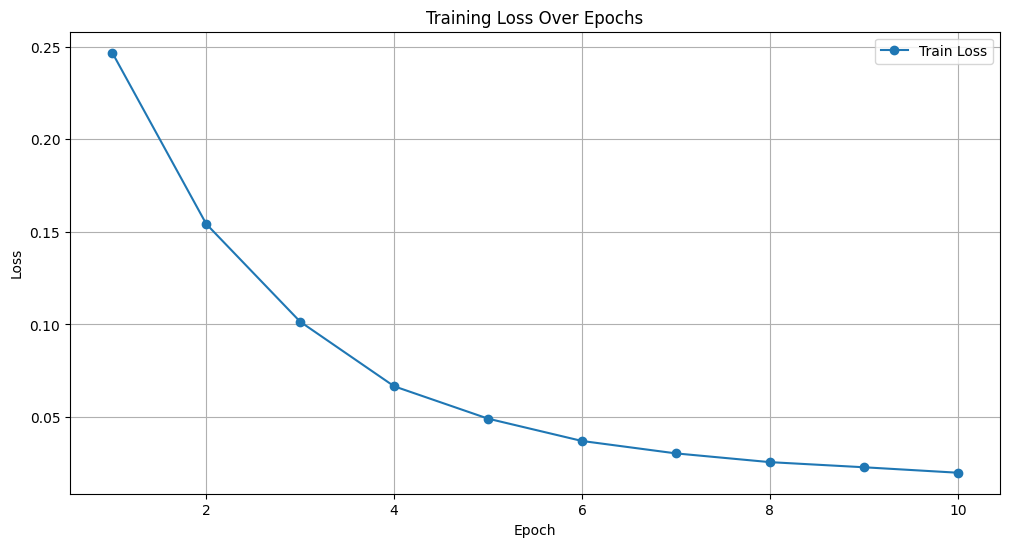

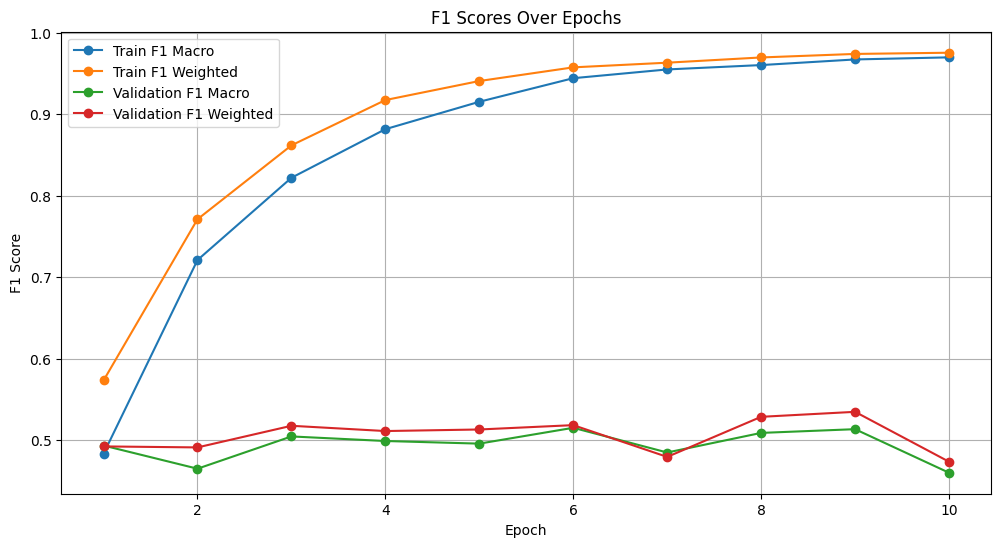

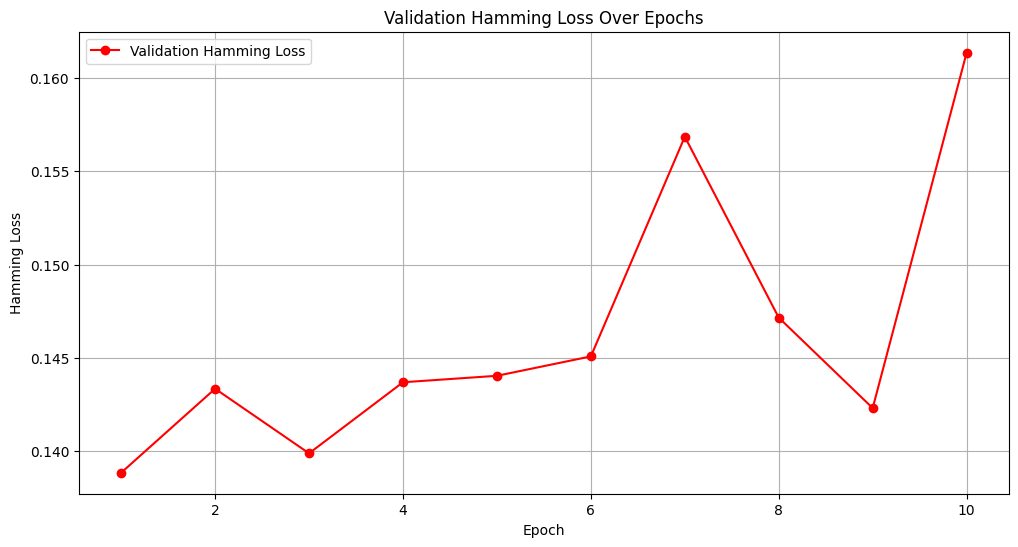

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_training_metrics(csv_file):
    """
    Plots training and validation metrics from a CSV file.

    Args:
        csv_file (str): Path to the CSV file containing training metrics.
    """
    # Load the CSV file into a DataFrame
    data = pd.read_csv(csv_file)
    
    # Plot training loss
    plt.figure(figsize=(12, 6))
    plt.plot(data['epoch'], data['train_loss'], label='Train Loss', marker='o')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot F1 scores
    plt.figure(figsize=(12, 6))
    plt.plot(data['epoch'], data['train_f1_macro'], label='Train F1 Macro', marker='o')
    plt.plot(data['epoch'], data['train_f1_weighted'], label='Train F1 Weighted', marker='o')
    plt.plot(data['epoch'], data['val_f1_macro'], label='Validation F1 Macro', marker='o')
    plt.plot(data['epoch'], data['val_f1_weighted'], label='Validation F1 Weighted', marker='o')
    plt.title('F1 Scores Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot validation Hamming loss
    plt.figure(figsize=(12, 6))
    plt.plot(data['epoch'], data['val_hamming'], label='Validation Hamming Loss', marker='o', color='red')
    plt.title('Validation Hamming Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Hamming Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_training_metrics('/media/nas_mount/avinash_ocr/Dhruvkumar_Patel_MT24032/mental-health-meme-classification/src/depression/output/ocr_bert/training_logs.csv')